# Part I: Research Question

- A. My research question for the churn dataset is: "What customer demographics and account information influence churn rate?" Given the impact of losing an existing customer and the expense of obtaining new ones, mitigating the churn rate is vital to business growth. Reducing churn rate requires predicting when a customer is at risk of being lost. To accurately predict this, all available information on a customer should be analyzed to determine the key factors to be used for prediction.

- B. Describe Variables

<center>

|Variable Name|Data Type|Description|Example|
|:-:|:-:|:-:|:-:|
|CaseOrder|Numeric|Used to keep record order from the original source|1|
|Customer_id|Categorical|Unique ID to each customer|K409198|
|Interaction|Categorical|Unique ID to the customer's transactions with the company|aa90260b-4141-4a24-8e36-b04ce1f4f77b|
|City|Categorical|City from the customer's billing information|Point Baker|
|State|Categorical|State from the customer's billing information|AK|
|County|Categorical|County from the customer's billing information|Prince of Wales-Hyder|
|Zip|Categorical|Zipcode from the customer's billing information|99927|
|Lat|Numeric|GPS coordinates representing their location as listed from their billing information|56.251|
|Lng|Numeric|GPS coordinates representing their location as listed from their billing information|-133.37571|
|Population|Numeric|Population from census data with a one mile radius|38|
|Area|Categorical|Type of area from the census data (urban,suburban,rural)|Urban|
|Timezone|Categorical|Time zone from the customer's sign-up information|America/Sitka|
|Job|Categorical|Job listed from the sign-up information for the invoiced individual|Environmental health practitioner|
|Children|Numeric|Number of children listed from the sign-up information|4|
|Age|Numeric|Customer age from the sign-up information|68|
|Education|Categorical|Highest level of education completed by the customer from the sign-up information|Master's Degree|
|Employment|Categorical|Status of employment as listed from the sign-up information|Part Time|
|Income|Numeric|Annual income of the customer as listed in the sign-up information|28561.99|
|Marital|Categorical|Reported marital status as listed in the sign-up information|Widowed|
|Gender|Categorical|Self-identification of customer gender (male,female,nonbinary)|Male|
|Churn|Categorical|Has the customer cancelled their service within the last month (yes,no)|No|
|Outage_sec_perweek|Numeric|System outages for the customer's area (average seconds per week)|6.972566093|
|Email|Numeric|Number of correspondence and marketing emails sent to the customer in the last year|10|
|Contacts|Numeric|Number of times technical support was contacted by the customer|0|
|Yearly_equip_failure|Numeric|Number of times the customer's equipment was reset/replaced due to equipment failure|1|
|Techie|Categorical|Is the customer technically inclined? (self-reported during sign-up) (yes,no)|No|
|Contract|Categorical|Customer contract term (two year, one year, month-to-month)|One year|
|Port_modem|Categorical|Does the customer have a portable modem? (yes,no)|Yes|
|Tablet|Categorical|Does the customer have a tablet of any kind? (yes no)|Yes|
|InternetService|Categorical|Type of internet service (DSL,fiber optic, None)|Fiber Optic|
|Phone|Categorical|Does the customer have a phone service? (yes no)|Yes|
|Multiple|Categorical|Does the customer have multiple lines of service? (yes no)|No|
|OnlineSecurity|Categorical|Does the customer have an online security service? (yes no)|Yes|
|OnlineBackup|Categorical|Does the customer have an online backup service? (yes no)|Yes|
|DeviceProtection|Categorical|Does the customer have a device protection service? (yes no)|No|
|TechSupport|Categorical|Does the customer have a technical support service? (yes no)|No|
|StreamingTV|Categorical|Does the customer have streaming TV service? (yes no)|No|
|StreamingMovies|Categorical|Does the customer have streaming movies service? (yes no)|Yes|
|PaperlessBilling|Categorical|Paperless billing enabled? (yes no)|Yes|
|PaymentMethod|Categorical|Current payment method (electronic check, mailed check, bank (automatic bank transfer), credit card(automatic))|Credit Card (automatic)|
|Tenure|Numeric|Number of months the customer has had active services|6.795512947|
|MonthlyCharge|Numeric|Average monthly charge to the customer|171.4497621|
|Bandwidth_GB_Year|Numeric|Average yearly data used in GB used by the customer|904.5361102|
|item1|Categorical|Timely response|5|
|item2|Categorical|Timely fixes|5|
|item3|Categorical|Timely replacements|5|
|item4|Categorical|Reliability|3|
|item5|Categorical|Options|4|
|item6|Categorical|Respectful response|4|
|item7|Categorical|Courteous exchange|3|
|item8|Categorical|Evidence of active listening|4|

</center>

# Part II: Data-Cleaning Plan

### C.1
I will detect missing values across all columns to assess data quality issues. Duplicates will only be checked for CaseOrder, Customer_id, and Interaction as we would expect these columns to be unique. Outlier detection will be used for quantitative columns excluding Lat, Lng, and Population. GPS coordinates for the customers may vary significantly based on their actual location and would yield no benefit to detecting them as they wouldn't be treated. Population for the customers is pulled from census data and will vary significantly while still retaining relevance. For example, a one-mile radius for the population in Utah versus New York City could have hundreds of thousands or millions separating them. Finally, the qualitative columns that have a restricted set of values will be checked to ensure their adherence to their expected values.
   - Missing values will be detected by *.isna().sum()*
   - Duplicates will be checked by *.duplicated().sum()*
   - Re-expression will be checked by *.unique()*
   - Outliers will be checked by the IQR method in a custom function which will utilize *.quantile()*
### C.2
Detecting missing values and duplicates, as previously described, is straightforward and works on all relevant columns in the dataset. Checking our categorical columns using the unique function is simple and easy to interpret. Outlier detection via the IQR method is a simple and effective method for detecting outliers. The use of percentiles allows it to be applied on columns of varying ranges and can appropriately handle skewed distributions.
### C.3
I chose to utilize Python for several key reasons. First, it has capabilities beyond statistics and analysis, such as machine learning and developing ETL pipelines. Additionally, it has a standard syntax and mimics English which can aid interpretation. This benefit is particularly noticeable when utilizing new libraries, as you won't have to relearn a new syntax on top of everything else the library has to offer. I will use pandas to support the data-cleaning process as it can efficiently handle large datasets, particularly in this type of CSV structure. Additionally, it has a large variety of functions that are commonly used in data cleaning and filtering.

### C.4 Data Quality Assessment

In [3]:
import pandas as pd

df = pd.read_csv("churn_raw_data.csv")

# Get counts for missing values in each column and filter out complete columns
missing_count = df.isna().sum()
print(f"Missing values:\n{missing_count[missing_count > 0]}")
print("-" * 36)

duplicate_cols_to_check = ["CaseOrder", "Customer_id", "Interaction"]
for col in duplicate_cols_to_check:
    print(f"{col} contains {df[col].duplicated().sum()} duplicates.")
print("-" * 36)

# Iterate through categorical columns and print unique values
reexpress_cols_to_check = [
    "Area",
    "Churn",
    "Techie",
    "Contract",
    "Port_modem",
    "Tablet",
    "InternetService",
    "Phone",
    "Multiple",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling",
    "PaymentMethod",
    "item1",
    "item2",
    "item3",
    "item4",
    "item5",
    "item6",
    "item7",
    "item8",
]

for col in reexpress_cols_to_check:
    print(f"{col} contains: {df[col].unique()}")
print("-" * 36)


def IQR_detect_outliers(column: pd.DataFrame, df=df):
    """Input column from dataframe(df) -> returns the outliers (index,column)"""
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter results to outside the lower and upper bounds, return only that column
    outliers = [
        df[column][((df[column] < lower_bound) | (df[column] > upper_bound))],
        lower_bound,
        upper_bound,
    ]
    return outliers


outlier_cols_to_check = [
    "Children",
    "Age",
    "Income",
    "Outage_sec_perweek",
    "Email",
    "Contacts",
    "Yearly_equip_failure",
    "Tenure",
    "MonthlyCharge",
    "Bandwidth_GB_Year",
]

for col in outlier_cols_to_check:
    outliers, lower_bound, upper_bound = IQR_detect_outliers(col)
    # Check if any outliers exist before attempting min/max.
    if outliers.any():
        print(
            f"{col} has {len(outliers)} outliers, ranging from {min(outliers):.2f} to {max(outliers):.2f}."
        )
    else:
        print(f"{col} has no outliers.")

Missing values:
Children             2495
Age                  2475
Income               2490
Techie               2477
InternetService      2129
Phone                1026
TechSupport           991
Tenure                931
Bandwidth_GB_Year    1021
dtype: int64
------------------------------------
CaseOrder contains 0 duplicates.
Customer_id contains 0 duplicates.
Interaction contains 0 duplicates.
------------------------------------
Area contains: ['Urban' 'Suburban' 'Rural']
Churn contains: ['No' 'Yes']
Techie contains: ['No' 'Yes' nan]
Contract contains: ['One year' 'Month-to-month' 'Two Year']
Port_modem contains: ['Yes' 'No']
Tablet contains: ['Yes' 'No']
InternetService contains: ['Fiber Optic' 'DSL' nan]
Phone contains: ['Yes' 'No' nan]
Multiple contains: ['No' 'Yes']
OnlineSecurity contains: ['Yes' 'No']
OnlineBackup contains: ['Yes' 'No']
DeviceProtection contains: ['No' 'Yes']
TechSupport contains: ['No' 'Yes' nan]
StreamingTV contains: ['No' 'Yes']
StreamingMovies contains

# Part III: Data Cleaning

### D.1
There were no duplicates in CaseOrder, Customer_id, or Interaction which is the only columns duplicates shouldn't exist. There appears to be no issues related to the expression of the categorical columns but they do have missing values that need to be handled. The previous detection method output provides us with the outliers and missing values as:
  
  <center>
  

  <table>
  <tr><th>Missing Values</th><th>Outliers</th></tr>

  <tr style="vertical-align:top"><td>

  |Column|Count|
  |:-:|:-:|
  |Children|2495|
  |Age|2475|
  |Income|2490|
  |Techie|2477|
  |InternetService|2129|
  |Phone|1026|
  |TechSupport|991|
  |Tenure|931|
  |Bandwidth_GB_Year|1021|

  </td>

  <td>

  |Column|Count|Minimum|Maximum|
  |:-:|:-:|:-:|:-:|
  |Children|302|8|10|
  |Income|249|104867.50|258900.70|
  |Outage_sec_perweek|539|-1.35|47.05|
  |Email|38|1|23|
  |Contacts|8|6|7|
  |Yearly_equip_failure|94|3|6|
  |MonthlyCharge|5|298.17|315.88|
  

  </td></tr>

  </table>
  
  
  </center>

### Data Cleaning

In [4]:
# Missing Values
# None was converted to NaN, set back to original value
df["InternetService"] = df["InternetService"].fillna("None")

# NA was converted to NaN, assume No for these columns
df[["Techie", "TechSupport", "Phone"]] = df[["Techie", "TechSupport", "Phone"]].fillna(
    "No"
)

# NA was converted to NaN, assume 0 for these columns
df[["Children", "Tenure", "Bandwidth_GB_Year"]] = df[
    ["Children", "Tenure", "Bandwidth_GB_Year"]
].fillna(0)

# NA was converted to NaN, fill with mean
df[["Income", "Age"]] = df[["Income", "Age"]].fillna(df[["Income", "Age"]].mean())
# ----------------------------------------------------------------------------
# Set columns to appropriate dtypes

int_columns = ["Children", "Age", "Email", "Contacts", "Yearly_equip_failure"]
df[int_columns] = df[int_columns].astype("int64")
# --------------------------------------------------------------------------
# Outliers
# Replace outliers with the lower/upper bounds


def clip_to_bounds(columns: pd.DataFrame, df: pd.DataFrame = df) -> pd.DataFrame:
    for column in columns:
        # df[column] = df[column].astype(float)
        outliers, lower_bound, upper_bound = IQR_detect_outliers(column)
        lower_bound = max(0, lower_bound)
        if df[column].dtype == "int64":
            lower_bound = round(lower_bound, 0)
            upper_bound = round(upper_bound, 0)
        df.loc[outliers.index, column] = df.loc[outliers.index, column].clip(
            lower_bound, upper_bound
        )
        remaining_outliers = len(
            df[column][((df[column] < lower_bound) | (df[column] > upper_bound))]
        )

        print(
            f"{column} clipped: {lower_bound=}, {upper_bound=}. There are {remaining_outliers} outliers remaining."
        )

    return df


df = clip_to_bounds(outlier_cols_to_check)

# --------------------------------------------------------------------------
# Confirm no missing values and outliers
missing_count = df.isna().sum()
missing_count = len(missing_count[missing_count > 0])
print("-" * 36)
print(f"There are {missing_count} missing values.")

Children clipped: lower_bound=0, upper_bound=8.0. There are 0 outliers remaining.
Age clipped: lower_bound=5.0, upper_bound=101.0. There are 0 outliers remaining.
Income clipped: lower_bound=0, upper_bound=78269.29624999998. There are 0 outliers remaining.
Outage_sec_perweek clipped: lower_bound=1.404439566250005, upper_bound=19.137566056249995. There are 0 outliers remaining.
Email clipped: lower_bound=4.0, upper_bound=20.0. There are 0 outliers remaining.
Contacts clipped: lower_bound=0, upper_bound=5.0. There are 0 outliers remaining.
Yearly_equip_failure clipped: lower_bound=0, upper_bound=2.0. There are 0 outliers remaining.
Tenure clipped: lower_bound=0, upper_bound=141.8602491825. There are 0 outliers remaining.
MonthlyCharge clipped: lower_bound=47.01153421249997, upper_bound=297.8369855125. There are 0 outliers remaining.
Bandwidth_GB_Year clipped: lower_bound=0, upper_bound=12179.648089749999. There are 0 outliers remaining.
------------------------------------
There are 0 mi

### D.2

There were no duplicates to treat, and no categorical variables required re-expression as it was handled with the missing values. As for missing values, InternetService was set to the original value in the CSV of None since it was converted when reading the CSV. Techie was set to No as it was NA in the CSV, which likely indicates they did not correctly complete the form when they signed up for service. TechSupport and Phone were set to No as they were listed in the dataset as NA, and if they are not applicable, it is safe to assume they do not have these services. A similar logic is applied to Children as the CSV contained NA in this column, which indicates they do not have children and are set to 0 in the data frame. Tenure and Bandwidth_GB_Year were also set to 0 from NA since this shows that the customer's tenure is less than a month and unavailable and that no bandwidth usage points towards the customer not using or even having internet service. Finally, Income and Age were filled with their respective means. This was done as it was unreasonable to drop them, which would remove 25 to 50 percent of our data, so the mean was filled to mitigate the impact on the dataset. This logic extends to all the previously discussed columns containing missing data due to the relatively small dataset and many missing values.

Outliers were treated by clipping their values to their lower and upper bounds. For Children, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure, and MonthlyCharge, the data points are close to their respective limits, and this approach retains their existence and impact while mitigating their ability to skew results. Some outliers for Income greatly exceed the upper bound but are still clipped to the IQR bounds. This method is still utilized as trends may be influenced by income levels, but there is insufficient data to identify trend changes above this income level. This also retains the data points and effectively groups them, which can provide insight into trends at higher income levels.

### D.3

To summarize, categorical columns' missing values were replaced with their most appropriate allowed value (No/None), and numeric columns were set to zero where logical. Income and Age values were set to the mean because setting them to zero would skew the data or be nonsensical, respectively. The cleaned dataset now contains no outliers or missing values, as seen from the above Data Cleaning output.

### D.4

See Data Cleaning above.

### D.5

See attached, code below was to generate file.

In [5]:
df.to_csv("cleaned_data.csv", index=False)

### D.6

The detection method for missing values has no disadvantages and provides a simple and accurate count. Detecting outliers with the IQR method has some limitations; for instance, it may not accurately represent the data distribution in small datasets. While this method is robust to outliers, it only applies to values within the calculated range, and values outside this range may still influence the detection of outliers. There are a few possible disadvantages to the methods utilized to treat the missing values. First, most of the missing values were set to No or 0 as it was assumed that this data was unavailable or not applicable. It would be the same as no or zero. If this assumption is incorrect and the data is missing due to an error in the extraction, bias is introduced. Next, the Income and Age were filled with their means, which can flatten or skew the data distribution and cause bias in the data. The missing values for InternetService are excluded from this as they were set back to their correct categorical values. To treat outliers, IQR was used again to detect them and then clipped to the lower and upper boundaries. The previous limitations of IQR still apply, and while limiting the outliers to this range retains the data points, it can distort the data as it changes the distribution, and information outside the clipped range can be lost. As a note, the outlier range from detection to treatment may shift and can be observed with the Income column. While other methods of detection or treatment of outliers may not exhibit this behavior, this is not limited to the IQR method but rather the requirements set to detect outliers and missing values before treatment.

### D.7

The previously discussed disadvantages may impact the ability to identify critical factors in churn rate due to possible bias. This may cause new patterns to emerge and be falsely identified or suppress existing patterns. Different detection and treatment methods may need to be applied to verify analysis. The previous limitations can lead to false conclusions and poor reliability of the findings.


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_columns = [
    "Lat",
    "Lng",
    "Income",
    "Outage_sec_perweek",
    "MonthlyCharge",
    "Bandwidth_GB_Year",
]

x = df[pca_columns]

x_scaled = StandardScaler().fit_transform(x)

pca = PCA()
pca.fit(x_scaled)

loadings = pca.components_.T
loadings_df = pd.DataFrame(
    loadings,
    index=[pca_columns],
    columns=["PC" + str(n) for n in range(1, len(loadings) + 1)],
)
print("PCA Loadings Matrix")
print(loadings_df)

PCA Loadings Matrix
                         PC1       PC2       PC3       PC4       PC5       PC6
Lat                -0.104312  0.692551  0.026482  0.057761  0.527805 -0.476316
Lng                 0.161691 -0.661915  0.126093 -0.227455  0.472541 -0.494767
Income             -0.050067  0.129876  0.920021 -0.335499 -0.076295  0.125725
Outage_sec_perweek  0.592537  0.217678 -0.129263 -0.402918 -0.496493 -0.419476
MonthlyCharge       0.669806  0.120293 -0.048697 -0.091601  0.478752  0.544907
Bandwidth_GB_Year   0.400910 -0.059330  0.343338  0.813409 -0.128832 -0.199094


### E.1

The six variables used for PCA can be seen above as the index of the dataframe alongside the loading matrix.

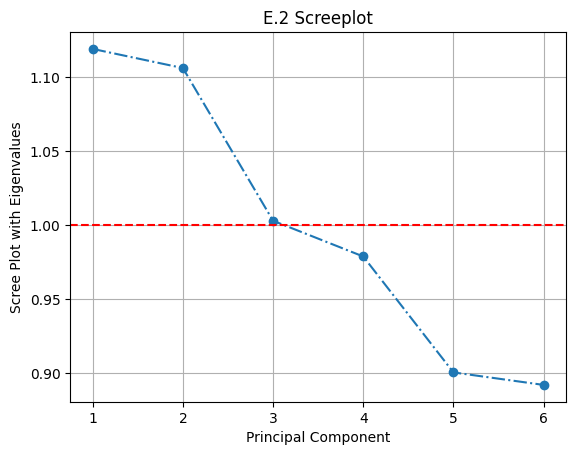

In [7]:
eigenvalues = pca.explained_variance_

plt.figure()
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o", ls="-.")
plt.title("E.2 Screeplot")
plt.xlabel("Principal Component")
plt.ylabel("Scree Plot with Eigenvalues")
plt.axhline(y=1, c="r", ls="--")
plt.grid()
plt.show()

### E.2

The Kaiser rule states that all principal components with eigenvalues greater than or equal to one should be retained, marked by the red line in the scree plot. Based on this, principal components one, two, and three should be retained. Furthermore, identifying which principal components to keep using the scree plot is to locate where the eigenvalues begin to level off, named the "elbow point." The elbow appears to occur at principal component three as well. Both methods support retaining the first three principal components as they capture the most significance in the data.

### E.3

The organization could benefit from utilizing PCA in a variety of ways. One benefit of PCA is plotting features in a two-dimensional space, allowing for accessible visualizations that still have significance. Additionally, it can improve algorithm runtime by reducing the dimensionality of the data, saving the organization money from needing additional or higher-end hardware or direct costs for cloud computing. Finally, it can provide insight into feature selection and engineering. For example, from the loading matrix in E1, in PC3, we can see that bandwidth has a value of 0.31, which suggests a moderate influence for this principal component. Meanwhile, income shows 0.91, indicating a high impact on PC3; the features with high influence on the main principal components are key features. Even if PCA is not further utilized, it has provided insight into our existing features' influence and can be focused on with other methods and models (Bigabid, n.d.).


# Part IV. Supporting Documents

### G Third-party Code References

No third-party code references were used.

### H References

Bigabid. (n.d.). What is PCA and how can I use it? Retrieved from https://www.bigabid.com/what-is-pca-and-how-can-i-use-it/
